In [165]:
import tellurium as te
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *

In [226]:
model = '''
// Created by libAntimony v2.11.0
model *Passos2010_DNAdamage_CellularSenescence()

  // Compartments and Species:
  compartment cell;
  substanceOnly species Mdm2 in cell, p53 in cell, Mdm2_p53 in cell, Mdm2_mRNA in cell;
  substanceOnly species p53_mRNA in cell, ATMA in cell, ATMI in cell, p21 in cell;
  substanceOnly species p21_mRNA in cell, p21step1 in cell, p21step2 in cell;
  substanceOnly species p53_P in cell, Mdm2_P in cell, p21_basal in cell;
  substanceOnly species p38 in cell, p38_P in cell, GADD45 in cell, IR in cell;
  substanceOnly species damDNA in cell, ROS in cell, basalROS in cell, $Sink in cell;
  substanceOnly species $Source in cell;

  // Reactions:
  p53mRNASynthesis: $Source => p53_mRNA; ksynp53mRNA*Source;
  p53mRNADegradation: p53_mRNA => $Sink; kdegp53mRNA*p53_mRNA;
  Mdm2Synthesis: Mdm2_mRNA => Mdm2_mRNA + Mdm2; ksynMdm2*Mdm2_mRNA;
  Mdm2mRNASynthesis1: p53 => p53 + Mdm2_mRNA; ksynMdm2mRNA*p53;
  Mdm2mRNASynthesis2: p53_P => p53_P + Mdm2_mRNA; ksynMdm2mRNA*p53_P;
  Mdm2mRNADegradation: Mdm2_mRNA => $Sink; kdegMdm2mRNA*Mdm2_mRNA;
  Mdm2Degradation: Mdm2 => $Sink; kdegMdm2*Mdm2;
  p53Synthesis: p53_mRNA => p53 + p53_mRNA; ksynp53*p53_mRNA;
  p53Degradation: Mdm2_p53 => Mdm2; kdegp53*Mdm2_p53;
  p53Mdm2IndepDegradation1: p53_P => $Sink; kdegp53mdm2ind*p53_P;
  p53Mdm2IndepDegradation2: p53 => $Sink; kdegp53mdm2ind*p53;
  P53_Mdm2Binding: p53 + Mdm2 => Mdm2_p53; kbinMdm2p53*p53*Mdm2;
  P53_Mdm2Release: Mdm2_p53 => p53 + Mdm2; krelMdm2p53*Mdm2_p53;
  DNAdamage: IR => IR + damDNA; kdam*IR;
  DNArepair: damDNA => $Sink; krepair*damDNA;
  ATMactivation: damDNA + ATMI => damDNA + ATMA; kactATM*damDNA*ATMI;
  p53phoshorylation: p53 + ATMA => p53_P + ATMA; kphosp53*p53*ATMA;
  p53dephosorylation: p53_P => p53; kdephosp53*p53_P;
  Mdm2phoshorylation: Mdm2 + ATMA => Mdm2_P + ATMA; kphosMdm2*Mdm2*ATMA;
  Mdm2dephosorylation: Mdm2_P => Mdm2; kdephosMdm2*Mdm2_P;
  Mdm2Pdegradation: Mdm2_P => $Sink; kdegATMMdm2*Mdm2_P;
  ATMInactivation: ATMA => ATMI; kinactATM*ATMA;
  p21mRNASynthesis1: p53 => p53 + p21_mRNA; ksynp21mRNAp53*p53;
  p21mRNASynthesis2: p53_P => p53_P + p21_mRNA; ksynp21mRNAp53P*p53_P;
  p21mRNADegradation: p21_mRNA => $Sink; kdegp21mRNA*p21_mRNA;
  p21Synthesis1: p21_mRNA => p21_mRNA + p21step1; ksynp21step1*p21_mRNA;
  p21Synthesis2: p21step1 => p21step2; ksynp21step2*p21step1;
  p21Synthesis3: p21step2 => p21; ksynp21step3*p21step2;
  p21degradation: p21 => $Sink; kdegp21*p21;
  GADD45activation2: p21 => p21 + GADD45; kGADD45*p21;
  GADD45degradation: GADD45 => $Sink; kdegGADD45*GADD45;
  p38activation: p38 + GADD45 => p38_P + GADD45; kphosp38*p38*GADD45;
  p38inactivation: p38_P => p38; kdephosp38*p38_P;
  ROSgenerationP38: p38_P => p38_P + ROS; kgenROSp38*p38_P*kp38ROS;
  ROSremoval: ROS => $Sink; kremROS*ROS;
  ROSDNAdamage: ROS => ROS + damDNA; kdamROS*ROS;
  basalROSDNAdamage: basalROS => basalROS + damDNA; kdamBasalROS*basalROS;

  // Events:
  stressCell: at time >= irDoseTime: IR = irIntensity; 
  stopStress: at time >= irDoseTime + irDoseDuration: IR = 0;
  stopp38ROS: at time >= stopp38ROSTime: kp38ROS = 0.6; //default: day 8
  irDoseTime = 172800; //default: day 2
  irIntensity = 20000; 
  irDoseDuration = 60*60*24*10; //default: 1 minute later
  stopp38ROSTime = 691200; //default: day 8

  // Species initializations:
  Mdm2 = 5/cell;
  p53 = 5/cell;
  Mdm2_p53 = 95/cell;
  Mdm2_mRNA = 10/cell;
  p53_mRNA = 10/cell;
  ATMA = 0;
  ATMI = 200/cell;
  p21 = 0;
  p21_mRNA = 1/cell;
  p21step1 = 0;
  p21step2 = 0;
  p53_P = 0;
  Mdm2_P = 0;
  p21_basal = 7/cell;
  p38 = 100/cell;
  p38_P = 0;
  GADD45 = 0;
  IR = 0;
  damDNA = 0;
  ROS = 0;
  basalROS = 10/cell;
  Sink = 1/cell;
  Source = 1/cell;

  // Compartment initializations:
  cell = 1;

  // Variable initializations:
  kp38ROS = 1;
  ksynMdm2 = 0.000495;
  kdegMdm2 = 0.000433;
  ksynp53 = 0.006;
  kdegp53 = 0.000825;
  kdegp53mdm2ind = 8.25e-07;
  kbinMdm2p53 = 0.001155;
  krelMdm2p53 = 1.155e-06;
  ksynMdm2mRNA = 0.0001;
  kdegMdm2mRNA = 0.0001;
  kactATM = 2e-05;
  kdegATMMdm2 = 0.0004;
  kinactATM = 0.0005;
  kphosp53 = 0.006;
  kdephosp53 = 0.5;
  kphosMdm2 = 2;
  kdephosMdm2 = 0.5;
  kphosp38 = 0.008;
  kdephosp38 = 0.1;
  kdam = 0.007; #rate of damage by ROS
  krepair = 6e-05;
  kGADD45 = 4e-06;
  kdegGADD45 = 1e-05;
  ksynp53mRNA = 0.001;
  kdegp53mRNA = 0.0001;
  ksynp21mRNAp53P = 6e-06;
  ksynp21mRNAp53 = 6e-08;
  kdegp21mRNA = 2.4e-05;
  ksynp21step1 = 0.0004;
  ksynp21step2 = 4e-05;
  ksynp21step3 = 4e-05;
  kdegp21 = 0.00019;
  kremROS = 0.000383;
  kgenROSp38 = 0.00045;
  kdamROS = 1e-05;
  kdamBasalROS = 1e-09;

  // Other declarations:
  var kp38ROS;
  const cell, ksynMdm2, kdegMdm2, ksynp53, kdegp53, kdegp53mdm2ind, kbinMdm2p53;
  const krelMdm2p53, ksynMdm2mRNA, kdegMdm2mRNA, kactATM, kdegATMMdm2, kinactATM;
  const kphosp53, kdephosp53, kphosMdm2, kdephosMdm2, kphosp38, kdephosp38;
  const kdam, krepair, kGADD45, kdegGADD45, ksynp53mRNA, kdegp53mRNA, ksynp21mRNAp53P;
  const ksynp21mRNAp53, kdegp21mRNA, ksynp21step1, ksynp21step2, ksynp21step3;
  const kdegp21, kremROS, kgenROSp38, kdamROS, kdamBasalROS;

  // Unit definitions:
  unit substance = item;

  // SBO terms:
  cell.sboTerm = 290
  Mdm2.sboTerm = 245
  p53.sboTerm = 245
  Mdm2_p53.sboTerm = 296
  Mdm2_mRNA.sboTerm = 278
  p53_mRNA.sboTerm = 278
  ATMA.sboTerm = 245
  ATMI.sboTerm = 245
  p21.sboTerm = 245
  p21_mRNA.sboTerm = 278
  p21step1.sboTerm = 245
  p21step2.sboTerm = 245
  p53_P.sboTerm = 245
  Mdm2_P.sboTerm = 245
  p21_basal.sboTerm = 245
  p38.sboTerm = 245
  p38_P.sboTerm = 245
  GADD45.sboTerm = 245
  IR.sboTerm = 405
  damDNA.sboTerm = 251
  ROS.sboTerm = 327
  basalROS.sboTerm = 327
  Sink.sboTerm = 291
  Source.sboTerm = 291
  kp38ROS.sboTerm = 9
  ksynMdm2.sboTerm = 9
  kdegMdm2.sboTerm = 356
  ksynp53.sboTerm = 9
  kdegp53.sboTerm = 356
  kdegp53mdm2ind.sboTerm = 282
  kbinMdm2p53.sboTerm = 337
  krelMdm2p53.sboTerm = 282
  ksynMdm2mRNA.sboTerm = 9
  kdegMdm2mRNA.sboTerm = 282
  kactATM.sboTerm = 363
  kdegATMMdm2.sboTerm = 356
  kinactATM.sboTerm = 349
  kphosp53.sboTerm = 9
  kdephosp53.sboTerm = 9
  kdephosMdm2.sboTerm = 9
  kphosp38.sboTerm = 9
  kdephosp38.sboTerm = 9
  kdam.sboTerm = 9
  krepair.sboTerm = 9
  kGADD45.sboTerm = 9
  kdegGADD45.sboTerm = 356
  ksynp53mRNA.sboTerm = 9
  kdegp53mRNA.sboTerm = 356
  ksynp21mRNAp53.sboTerm = 9
  kdegp21mRNA.sboTerm = 356
  ksynp21step1.sboTerm = 9
  ksynp21step2.sboTerm = 9
  ksynp21step3.sboTerm = 9
  kdegp21.sboTerm = 356
  kremROS.sboTerm = 356
  kgenROSp38.sboTerm = 9
  kdamROS.sboTerm = 9
  kdamBasalROS.sboTerm = 9
  p53mRNASynthesis.sboTerm = 183
  p53mRNADegradation.sboTerm = 179
  Mdm2Synthesis.sboTerm = 184
  Mdm2mRNASynthesis1.sboTerm = 183
  Mdm2mRNASynthesis2.sboTerm = 183
  Mdm2mRNADegradation.sboTerm = 179
  Mdm2Degradation.sboTerm = 179
  p53Synthesis.sboTerm = 184
  p53Degradation.sboTerm = 179
  p53Mdm2IndepDegradation1.sboTerm = 179
  p53Mdm2IndepDegradation2.sboTerm = 179
  P53_Mdm2Binding.sboTerm = 526
  P53_Mdm2Release.sboTerm = 180
  DNAdamage.sboTerm = 375
  DNArepair.sboTerm = 179
  ATMactivation.sboTerm = 176
  p53phoshorylation.sboTerm = 216
  p53dephosorylation.sboTerm = 216
  Mdm2phoshorylation.sboTerm = 216
  Mdm2dephosorylation.sboTerm = 330
  Mdm2Pdegradation.sboTerm = 179
  ATMInactivation.sboTerm = 176
  p21mRNASynthesis1.sboTerm = 183
  p21mRNASynthesis2.sboTerm = 183
  p21mRNADegradation.sboTerm = 179
  p21Synthesis1.sboTerm = 184
  p21Synthesis2.sboTerm = 184
  p21Synthesis3.sboTerm = 184
  p21degradation.sboTerm = 179
  GADD45activation2.sboTerm = 176
  GADD45degradation.sboTerm = 179
  p38activation.sboTerm = 176
  p38inactivation.sboTerm = 176
  ROSgenerationP38.sboTerm = 393
  ROSremoval.sboTerm = 179
  ROSDNAdamage.sboTerm = 176
  basalROSDNAdamage.sboTerm = 176

  // CV terms:
  cell hypernym "http://identifiers.org/go/GO:0005623"
  Mdm2 hypernym "http://identifiers.org/uniprot/Q00987"
  p53 hypernym "http://identifiers.org/uniprot/P04637"
  Mdm2_p53 part "http://identifiers.org/uniprot/Q00987",
                "http://identifiers.org/uniprot/P04637"
  Mdm2_mRNA encodement "http://identifiers.org/uniprot/Q00987"
  p53_mRNA encodement "http://identifiers.org/uniprot/P04637"
  ATMA hypernym "http://identifiers.org/uniprot/Q13315"
  ATMI hypernym "http://identifiers.org/uniprot/Q13315"
  p21 hypernym "http://identifiers.org/uniprot/P38936"
  p21_mRNA encodement "http://identifiers.org/uniprot/P38936"
  p21step1 hypernym "http://identifiers.org/uniprot/P38936"
  p21step2 hypernym "http://identifiers.org/uniprot/P38936"
  p53_P hypernym "http://identifiers.org/uniprot/P04637"
  Mdm2_P hypernym "http://identifiers.org/uniprot/Q00987"
  p21_basal hypernym "http://identifiers.org/uniprot/P38936"
  p38 hypernym "http://identifiers.org/uniprot/Q16539"
  p38_P hypernym "http://identifiers.org/uniprot/Q16539"
  GADD45 part "http://identifiers.org/uniprot/P24522",
              "http://identifiers.org/uniprot/O75293",
              "http://identifiers.org/uniprot/O95257"
  damDNA hypernym "http://identifiers.org/chebi/CHEBI:16991"
  ROS hypernym "http://identifiers.org/chebi/CHEBI:26523"
  basalROS hypernym "http://identifiers.org/chebi/CHEBI:26523"
  p53mRNASynthesis parthood "http://identifiers.org/go/GO:0006351"
  p53mRNADegradation hypernym "http://identifiers.org/go/GO:0009056"
  Mdm2Synthesis hypernym "http://identifiers.org/go/GO:0006412"
  Mdm2mRNASynthesis1 hypernym "http://identifiers.org/go/GO:0006351"
  Mdm2mRNASynthesis2 hypernym "http://identifiers.org/go/GO:0006351"
  Mdm2mRNADegradation hypernym "http://identifiers.org/go/GO:0009056"
  Mdm2Degradation hypernym "http://identifiers.org/go/GO:0009056"
  p53Synthesis hypernym "http://identifiers.org/go/GO:0006412"
  p53Degradation hypernym "http://identifiers.org/go/GO:0009056"
  p53Mdm2IndepDegradation1 hypernym "http://identifiers.org/go/GO:0009056"
  p53Mdm2IndepDegradation2 hypernym "http://identifiers.org/go/GO:0009056"
  P53_Mdm2Binding hypernym "http://identifiers.org/go/GO:0006461"
  P53_Mdm2Release hypernym "http://identifiers.org/go/GO:0043241"
  DNAdamage hypernym "http://identifiers.org/go/GO:0006950"
  DNArepair hypernym "http://identifiers.org/go/GO:0006281"
  ATMactivation parthood "http://identifiers.org/go/GO:0006974"
  p53phoshorylation hypernym "http://identifiers.org/go/GO:0016310"
  p53dephosorylation hypernym "http://identifiers.org/go/GO:0016310"
  Mdm2phoshorylation hypernym "http://identifiers.org/go/GO:0016310"
  Mdm2dephosorylation hypernym "http://identifiers.org/go/GO:0016311"
  Mdm2Pdegradation hypernym "http://identifiers.org/go/GO:0009056"
  ATMInactivation hypernym "http://identifiers.org/go/GO:0006464"
  p21mRNASynthesis1 hypernym "http://identifiers.org/go/GO:0006351"
  p21mRNASynthesis2 hypernym "http://identifiers.org/go/GO:0006351"
  p21mRNADegradation hypernym "http://identifiers.org/go/GO:0009056"
  p21Synthesis1 hypernym "http://identifiers.org/go/GO:0006412"
  p21Synthesis2 hypernym "http://identifiers.org/go/GO:0006412"
  p21Synthesis3 hypernym "http://identifiers.org/go/GO:0006412"
  p21degradation hypernym "http://identifiers.org/go/GO:0009056"
  GADD45activation2 hypernym "http://identifiers.org/go/GO:0006412"
  GADD45degradation hypernym "http://identifiers.org/go/GO:0009056"
  p38activation hypernym "http://identifiers.org/go/GO:0006464"
  p38inactivation hypernym "http://identifiers.org/go/GO:0006464"
  ROSgenerationP38 hypernym "http://identifiers.org/go/GO:0052064"
  ROSremoval hypernym "http://identifiers.org/go/GO:0009056"
  ROSDNAdamage hypernym "http://identifiers.org/go/GO:0034614"
  basalROSDNAdamage hypernym "http://identifiers.org/go/GO:0034614"
end

Passos2010_DNAdamage_CellularSenescence is "Passos2010_DNAdamage_CellularSenescence"

Passos2010_DNAdamage_CellularSenescence model_entity_is "http://identifiers.org/biomodels.db/MODEL5989624192"
Passos2010_DNAdamage_CellularSenescence model_entity_is "http://identifiers.org/biomodels.db/BIOMD0000000287"
Passos2010_DNAdamage_CellularSenescence description "http://identifiers.org/pubmed/20160708"
Passos2010_DNAdamage_CellularSenescence origin "http://identifiers.org/biomodels.db/BIOMD0000000188",
                                               "http://identifiers.org/biomodels.db/BIOMD0000000189"
Passos2010_DNAdamage_CellularSenescence parthood "http://identifiers.org/kegg.pathway/ko05200"
Passos2010_DNAdamage_CellularSenescence taxon "http://identifiers.org/taxonomy/9606"
Passos2010_DNAdamage_CellularSenescence hypernym "http://identifiers.org/go/GO:0090398",
                                                 "http://identifiers.org/go/GO:0006974"
'''
r = te.loada(model)

TIME_LIMIT_DAYS = 12
DAY = 60*60*24
TIME_LIMIT = DAY*TIME_LIMIT_DAYS

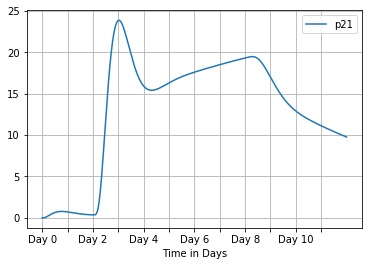

In [163]:
r.resetAll()
result = r.simulate(0, TIME_LIMIT, 12000, ["time","p21"])
X_LIM = np.arange(0, TIME_LIMIT, DAY)
X_TICKS = ['Day '+str(n) if n%2==0 else '' for n in np.arange(0, 14, 1)]

# plt.figure (figsize=(10,4))
plt.grid(True)
plt.interactive(False)
plt.plot(result[:,0], result[:,1])
plt.xticks(X_LIM, X_TICKS)
plt.xlabel("Time in Days")
plt.legend(['p21'])

plt.show(block=True)

In [191]:
def rePlot(radiationDay, maxDays):
    r.resetAll()
    
    r.irDoseTime = radiationDay * DAY
    r.irIntensity = 200
    
    result = r.simulate(0, DAY*maxDays, 12000, ["time","p21"])
    X_LIM = np.arange(0, DAY*maxDays, DAY)
    X_TICKS = [n if n%2==0 else '' for n in np.arange(0, maxDays, 1)]
    
    # plt.figure (figsize=(10,4))
    plt.grid(True)
    plt.interactive(False)
    plt.plot(result[:,0], result[:,1])
    plt.xticks(X_LIM, X_TICKS)
    plt.xlabel("Time in Days")
    plt.legend(['p21'])
    plt.title("Effect of Radiation on p21")

    plt.show(block=True)

style = {'description_width': 'auto'}
layout = {'width': '375px'}
slider1 = IntSlider(description = 'Day IR is Applied:', min=0, max=30, step=1, value=2, continuous_update=False, style=style, layout=layout)
slider2 = IntSlider(description = 'Duration in Days:', min=2, max=30, step=1, value=12, continuous_update=False, style=style, layout=layout)
interact(rePlot, radiationDay=slider1, maxDays = slider2);

interactive(children=(IntSlider(value=2, continuous_update=False, description='Day IR is Applied:', layout=Layout(width='375px'), max=30, style=SliderStyle(description_width='auto')), IntSlider(value=12, continuous_update=False, description='Duration in Days:', layout=Layout(width='375px'), max=30, min=2, style=SliderStyle(description_width='auto')), Output()), _dom_classes=('widget-interact',))

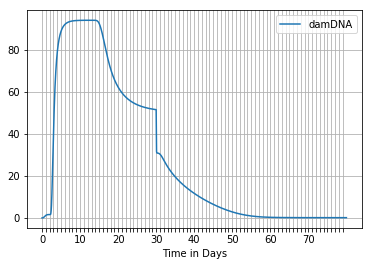

In [229]:
r.resetAll()
r.stopp38ROSTime = DAY*30
MAX_DAYS = 80
result = r.simulate(0, DAY*MAX_DAYS, 10000, ["time","ROS","damDNA"])
X_LIM = np.arange(0, DAY*MAX_DAYS, DAY)
X_TICKS = [n if n%10==0 else '' for n in np.arange(0, MAX_DAYS, 1)]

# plt.figure (figsize=(10,4))
plt.grid(True)
plt.interactive(False)
plt.plot(result[:,0], result[:,1])
plt.xticks(X_LIM, X_TICKS)
plt.xlabel("Time in Days")
plt.legend(["damDNA"])

plt.show(block=True)

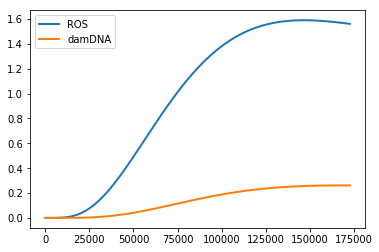

In [207]:
r.resetAll()
result = r.simulate(0, DAY*2, 10000, ["time","ROS","damDNA"])
r.plot()